# WINE REVIEW DATASET ANALYSIS

## Modules

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

## Setting up the dataset

In [17]:
df = pd.read_csv("wine-mgmt.csv")
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


## Cleaning the dataset

In [32]:
# Removing the "Unnamed: 0" column
# df.drop(columns=['Unnamed: 0'], inplace=True) # run once
df.head()

# Changing column names
df.columns
df.rename(columns={'country':'Country', 'description':'Description', 'designation':'Designation', 'points':'Points', 'price':'Price',
                  'province':'Province', 'region_1':'Region_1', 'region_2':'Region_2', 'variety':'Variety',
                  'winery':'Winery'}, inplace=True)
df.head()

,Country,Description,Designation,Points,Price,Province,Region_1,Region_2,Variety,Winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [33]:
# checking for empty values
df.isnull().sum()
# here, Price is the only quantitative column with null values

# replacing empty/null values with their respective mean values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean', fill_value=None)

df['Price'] = imputer.fit_transform(df[['Price']])
df.isnull().sum()

Country            5
Description        0
Designation    45735
Points             0
Price              0
Province           5
Region_1       25060
Region_2       89977
Variety            0
Winery             0
dtype: int64

In [78]:
# Looking at the Descriptive Statistics of the quantitative data in the dataset
df.describe()

,Points,Price
count,131513.000000,131513.000000
mean,87.396531,24.826250
std,2.963203,11.095501
min,80.000000,4.000000
25%,85.000000,15.000000
50%,87.000000,23.000000
75%,90.000000,33.131482
max,99.000000,50.000000


## Data Visualization - Histogram

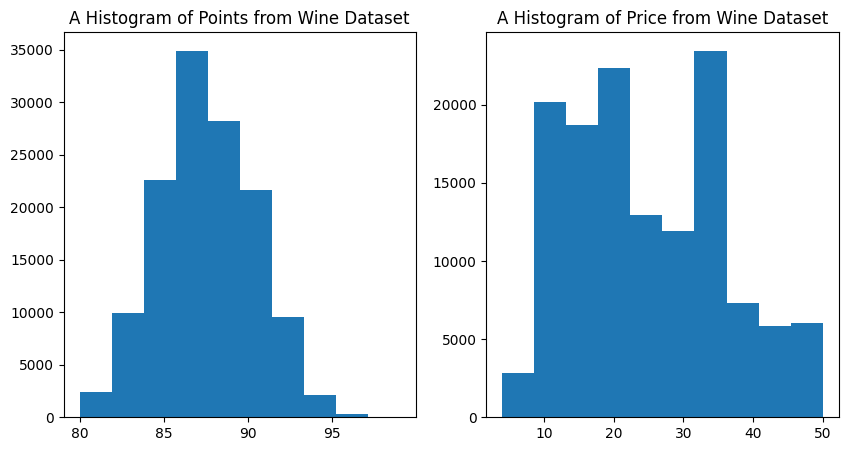

In [70]:
# dropping the row from 'Price' column that contains the outlier '2300'
# we choose 75 because the Q3 of Price column is 38, and the std deviation is 34.
df = df[df['Price'] <= 75]

plt.figure(figsize=(10, 5))

# Points
plt.subplot(1, 2, 1)
plt.hist(df['Points'], bins=10)
plt.title('A Histogram of Points from Wine Dataset')

# Price
plt.subplot(1, 2, 2)
plt.hist(df['Price'], bins=10)
plt.title('A Histogram of Price from Wine Dataset')

plt.show()

Here, we can observe that the histogram for 'Price' column is way off. It is because, the max-price '2300' is an outlier. We need to neglect this outlier and recreate the histogram.

## Descriptive Analysis

## Measures of Central Tendency

In [120]:
# Mean
df[['Points', 'Price']].mean()

# # Median
df[['Points', 'Price']].median()


# # Mode
df[['Points', 'Price']].mode()

,Points,Price
0,87,33.131482


## Measures of Variability

In [126]:
# Range
range_Points = df['Points'].max() - df['Points'].min()
range_Points

range_Price = df['Price'].max() - df['Price'].min()
range_Price


# Interquartile Range (IQR)
iqr_Points = sts.iqr(df['Points'])
iqr_Points

iqr_Price = sts.iqr(df['Price'])
iqr_Price


# Variance
df[['Points', 'Price']].var()


# # Standard Deviation
df[['Points', 'Price']].std()

Points     2.963203
Price     11.095501
dtype: float64

## Measures of Shape

In [88]:
# Skewness
skew_Points = sts.skew(df['Points'])
skew_Points

skew_Price = sts.skew(df['Price'])
skew_Price

# Kurtosis
kurt_Points = sts.kurtosis(df['Points'], fisher=False)
kurt_Points

kurt_Price = sts.kurtosis(df['Price'], fisher=False)
kurt_Price

2.2838538999006155

## Measures of Position

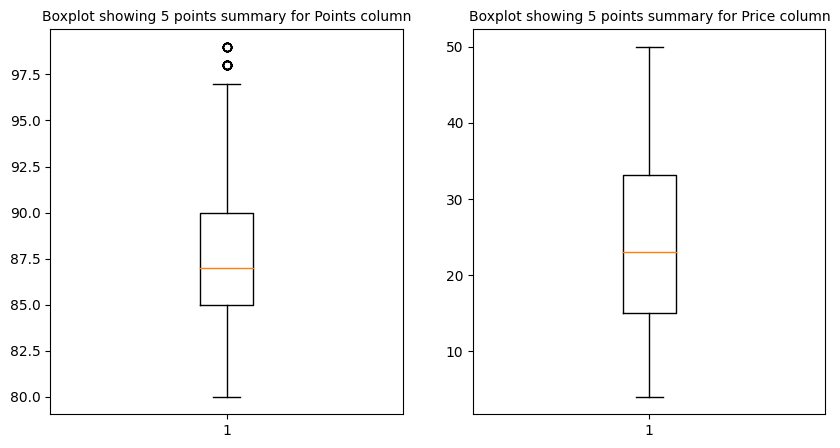

In [98]:
# Box plot
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.boxplot(df['Points'])
plt.title("Boxplot showing 5 points summary for Points column", fontdict={'size':10})

plt.subplot(1, 2, 2)
plt.boxplot(df['Price'])
plt.title("Boxplot showing 5 points summary for Price column", fontdict={'size':10})

plt.show()

In [115]:
# Deciles
deciles_Points = np.percentile(df['Points'], np.arange(0, 100, 10))
deciles_Points

deciles_Price = np.percentile(df['Price'], np.arange(0, 100, 10))
deciles_Price


# Quartiles
quartile_Points = np.percentile(df['Points'], [25, 50, 75])
quartile_Points

quartile_Price = np.percentile(df['Price'], [25, 50, 75])
quartile_Price


# Percentiles
percentile_Points = np.percentile(df['Points'], [5, 11, 33, 78])
percentile_Points

percentile_Points = np.percentile(df['Price'], [5, 11, 33, 78])
percentile_Points


# Standard Score
z_Points = pd.DataFrame(sts.zscore(df['Points']))
z_Points

z_Price = pd.DataFrame(sts.zscore(df['Price']))
z_Price

,Price
11,2.088580
12,2.088580
20,-0.074467
24,1.818199
30,-0.885610
...,...
150923,0.466294
150925,-0.434975
150926,0.195913
150927,-0.434975
